# IMPORT LIBRARIES AND DATASET

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [2]:
#load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


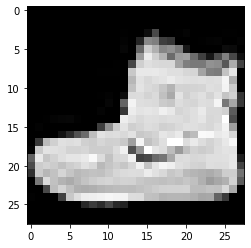

In [3]:
#visualize a sample image
plt.imshow(X_train[0], cmap='gray')

In [6]:
#shape
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


# PERFORM DATA VISUALIZATION

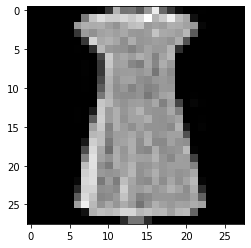

In [7]:
#view some images
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap='gray')

In [9]:
#corresponding label
label = y_train[i]
label


3

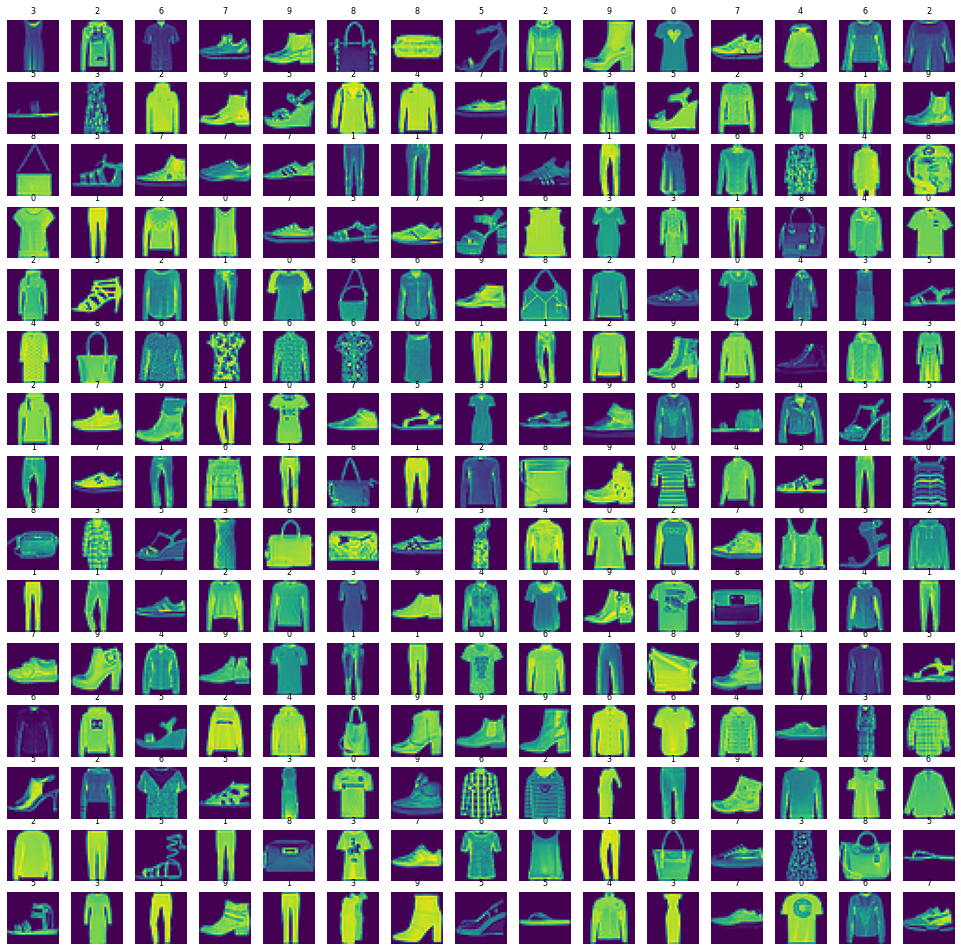

In [13]:
#view more images in a grid format
#define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

#select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index], fontsize=8)
  axes[i].axis('off')

# PERFORM DATA PREPROCESSING

In [14]:
#normalize data
X_train = X_train/255
X_test = X_test/255

In [15]:
#now the values are between 0-1
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [19]:
#add some noise
noise_factor = 0.3

noise_train_dataset = []

#go through every single image and add noise
for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  #after noise added, pixel might be more than 1, hence need clipping
  noisy_image = np.clip(noisy_image, 0, 1)
  noise_train_dataset.append(noisy_image)

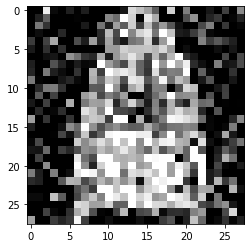

In [21]:
#check out some examples
plt.imshow(noise_train_dataset[22], cmap='gray')

In [22]:
#add noise to testing dataset
noise_factor = 0.1

noise_test_dataset = []

#go through every single image and add noise
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  #after noise added, pixel might be more than 1, hence need clipping
  noisy_image = np.clip(noisy_image, 0, 1)
  noise_test_dataset.append(noisy_image)

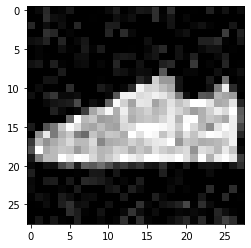

In [23]:
#check out some examples
plt.imshow(noise_test_dataset[22], cmap='gray')

# BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [25]:
#model architect
autoencoder = tf.keras.models.Sequential()

#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same', 
                                       input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same'))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding='same',
                                                activation='sigmoid'))

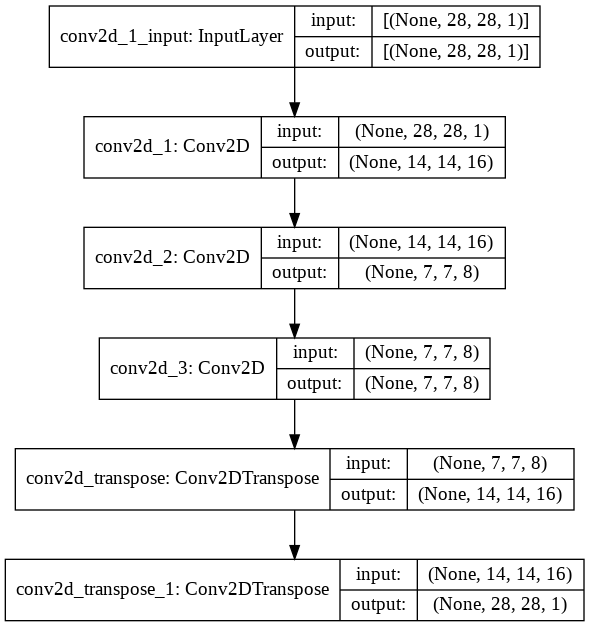

In [26]:
from keras.utils.vis_utils import plot_model

#plot
plot_model(autoencoder, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [34]:
#compile
autoencoder.compile(loss='binary_crossentropy', 
                    optimizer=tf.keras.optimizers.Adam(lr=0.001),
                    metrics=['accuracy'])

#summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [35]:
#add callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1),
                 ModelCheckpoint(filepath = 'model.h5', monitor = 'val_loss', save_best_only = True)]

In [36]:
#fit
history = autoencoder.fit((np.array(noise_train_dataset)).reshape(-1, 28, 28, 1),
                          X_train.reshape(-1, 28, 28, 1),
                          epochs=50,
                          batch_size=200,
                          validation_data=((np.array(noise_test_dataset)).reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)),
                          callbacks=early_stopping,
                          verbose=1)

Epoch 1/50
300/300 [==============================] - 2s 6ms/step - loss: 0.2998 - accuracy: 0.5093 - val_loss: 0.2873 - val_accuracy: 0.5074
Epoch 2/50
300/300 [==============================] - 2s 5ms/step - loss: 0.2996 - accuracy: 0.5093 - val_loss: 0.2876 - val_accuracy: 0.5074
Epoch 3/50
300/300 [==============================] - 2s 5ms/step - loss: 0.2995 - accuracy: 0.5093 - val_loss: 0.2866 - val_accuracy: 0.5074
Epoch 4/50
300/300 [==============================] - 2s 5ms/step - loss: 0.2994 - accuracy: 0.5093 - val_loss: 0.2875 - val_accuracy: 0.5074
Epoch 5/50
300/300 [==============================] - 2s 5ms/step - loss: 0.2993 - accuracy: 0.5093 - val_loss: 0.2859 - val_accuracy: 0.5074
Epoch 6/50
300/300 [==============================] - 2s 5ms/step - loss: 0.2992 - accuracy: 0.5093 - val_loss: 0.2864 - val_accuracy: 0.5074
Epoch 7/50
300/300 [==============================] - 2s 5ms/step - loss: 0.2992 - accuracy: 0.5093 - val_loss: 0.2865 - val_accuracy: 0.5074
Epoch 

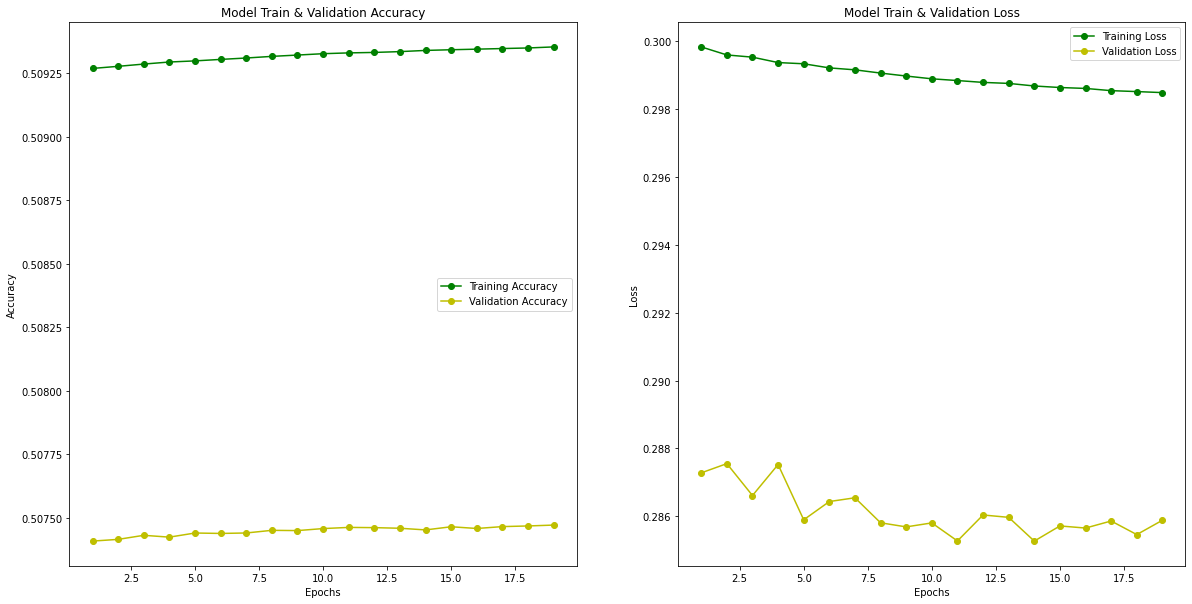

In [37]:
#plot the training artifacts
fig , ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs, train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'yo-' , label = 'Validation Accuracy')
ax[0].set_title('Model Train & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs, val_loss , 'yo-' , label = 'Validation Loss')
ax[1].set_title('Model Train & Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

# EVALUATE TRAINED MODEL PERFORMANCE

In [40]:
#evaluate trained model
print('Train loss & accuracy:', autoencoder.evaluate((np.array(noise_train_dataset)).reshape(-1, 28, 28, 1), X_train))
print('\n')
print('Test loss & accuracy:', autoencoder.evaluate((np.array(noise_test_dataset)).reshape(-1, 28, 28, 1), X_test))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2985 - accuracy: 0.5093
Train loss & accuracy: [0.29850876331329346, 0.5093439817428589]


313/313 [==============================] - 1s 3ms/step - loss: 0.2859 - accuracy: 0.5075
Test loss & accuracy: [0.28588107228279114, 0.5074717402458191]


In [42]:
#predict
preds = autoencoder.predict((np.array(noise_test_dataset[:10])).reshape(-1, 28, 28, 1))

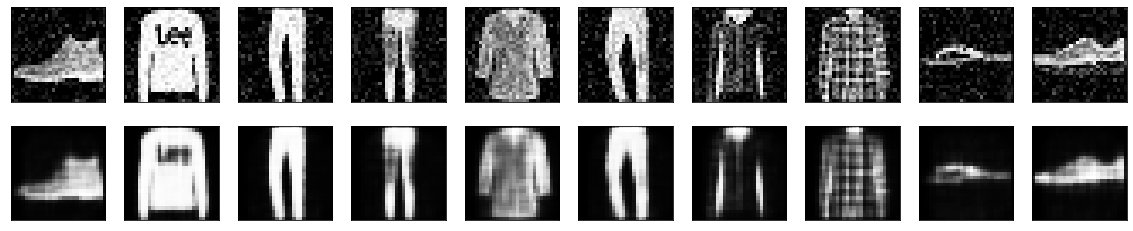

In [45]:
#plot prediction
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], preds], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)